In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from pprint import pprint

import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS



# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
#import logging
#logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
import nltk

In [3]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Prashant
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Prashant
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Prashant
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to C:\Users\Prashant
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to C:\Users\Prashant
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]   

[nltk_data]    |   Package pil is already up-to-date!
[nltk_data]    | Downloading package pl196x to C:\Users\Prashant
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pl196x is already up-to-date!
[nltk_data]    | Downloading package ppattach to C:\Users\Prashant
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ppattach is already up-to-date!
[nltk_data]    | Downloading package problem_reports to
[nltk_data]    |     C:\Users\Prashant
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package problem_reports is already up-to-date!
[nltk_data]    | Downloading package propbank to C:\Users\Prashant
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to C:\Users\Prashant
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    

[nltk_data]    |   Package punkt is already up-to-date!
[nltk_data]    | Downloading package book_grammars to
[nltk_data]    |     C:\Users\Prashant
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package book_grammars is already up-to-date!
[nltk_data]    | Downloading package sample_grammars to
[nltk_data]    |     C:\Users\Prashant
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sample_grammars is already up-to-date!
[nltk_data]    | Downloading package spanish_grammars to
[nltk_data]    |     C:\Users\Prashant
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package spanish_grammars is already up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Prashant
[nltk_data]    |     Kumar\AppData\Roaming\nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package large_grammars to
[nltk_data]    |     C:

True

In [4]:
%cd "C:\Users\Prashant Kumar\Desktop\Shailee\Alabs\Final Projects\Project 5"

C:\Users\Prashant Kumar\Desktop\Shailee\Alabs\Final Projects\Project 5


In [5]:
cust_reviews = pd.read_excel( "BankReviews.xlsx")

In [6]:
cust_reviews.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [7]:
cust_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      505 non-null    datetime64[ns]
 1   Stars     505 non-null    int64         
 2   Reviews   505 non-null    object        
 3   BankName  505 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [8]:
cust_reviews.shape

(505, 4)

In [9]:
#checking missing values
cust_reviews.isnull().sum()

Date        0
Stars       0
Reviews     0
BankName    0
dtype: int64

There is no null value.

In [10]:
#no of unique banks
len(cust_reviews.BankName.unique())

7

In [11]:
#Star rating counts
cust_reviews['Stars'].value_counts()

5    410
1     95
Name: Stars, dtype: int64

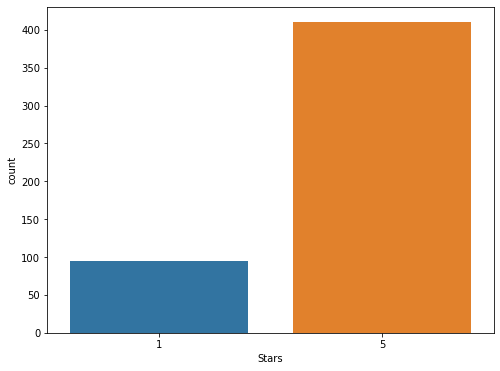

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(cust_reviews.Stars)
plt.show()

# Classification of reviews into positive/negative/neutral

In [13]:
#Sentiment Polarization/Analysis
X = cust_reviews['Reviews']
Y = cust_reviews['Stars']

In [14]:
X.head()

0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
Name: Reviews, dtype: object

In [15]:
Y.head()

0    5
1    5
2    5
3    5
4    5
Name: Stars, dtype: int64

In [16]:
#User Defined Function to find Sentiment Polarity of the reviews

def sentiment_review(text):
    analysis = TextBlob(text)
    polarity_text = analysis.sentiment.polarity
    if polarity_text > 0:
        return 'Positive'
    elif polarity_text == 0:
        return 'Neutral'
    else: 
        return 'Negative'

In [17]:
#dictionary to store review and the sentiment of the review
final_dictionary = []

for text in X:
    dictionary_sentiment = {}
    dictionary_sentiment['Review'] = text
    dictionary_sentiment['Sentiment'] = sentiment_review(text)
    final_dictionary.append(dictionary_sentiment)
print(final_dictionary[:5])

[{'Review': 'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!', 'Sentiment': 'Positive'}, {'Review': 'Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!', 'Sentiment': 'Positive'}, {'Review': 'We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind', 'Sentiment': 'Negative'}, {'Review': 'We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but 

In [18]:
#Finding positive reviews
positive_reviews = []

for review in final_dictionary:
    if review['Sentiment'] == 'Positive':
        positive_reviews.append(review)
print(positive_reviews[:5]) 

[{'Review': 'Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!', 'Sentiment': 'Positive'}, {'Review': 'Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!', 'Sentiment': 'Positive'}, {'Review': 'We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but with the help from Brad and the entire Wyndham Mortgage team it was turned into a happy ending!! Brad and Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled\xa0together and found a viable option for us that ultimately saved us money. We are indebted and would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & LindRead Less', 'Sentimen

In [19]:
#Finding neutral reviews
neutral_reviews = []

for review in final_dictionary:
    if review['Sentiment'] == 'Neutral':
        neutral_reviews.append(review)
print(neutral_reviews[:5]) 

[{'Review': '\r\nPerson with whom I spoke kept interrupting me and telling me his "line" rather than listening to what info I wanted. Quite pushy, altho\' he said he wasn\'t a salesman. Closing costs were astronomical.\r\n        ', 'Sentiment': 'Neutral'}, {'Review': '\r\nThe rate re-lock-in rule was not followed.\r\n        ', 'Sentiment': 'Neutral'}, {'Review': "\r\nLending tree matching me up with companies that don't offer the product I requested.\r\n        ", 'Sentiment': 'Neutral'}, {'Review': '\r\nThey called me and asked about the city in NH that we where looking at and when I told him we might consider MA as well he hung up on me.\r\n        ', 'Sentiment': 'Neutral'}]


In [20]:
#Finding negative reviews
negative_reviews = []

for review in final_dictionary:
    if review['Sentiment'] == 'Negative':
        negative_reviews.append(review)
print(negative_reviews[:5]) 

[{'Review': 'We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind', 'Sentiment': 'Negative'}, {'Review': 'This was the worst experience ever. It was like they had never gone through the process before. I could not get a complete list of the documents required. Every other day it was a new request. The appraiser that they hired made so many mistakes I had to send in corrections and then during the underwriting process they had to go back and make more corrections. Wyndum would continue to ask for copies of documents over and over again. There were many documents that I had to send 3 a

In [21]:
#counting number of positives, negatives and neutral reviews
reviews_count = pd.DataFrame([len(positive_reviews),len(neutral_reviews),len(negative_reviews)],index=['Positive','Neutral','Negative'])

In [22]:
reviews_count

,0
Positive,466
Neutral,4
Negative,35


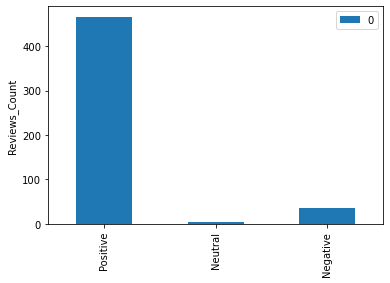

In [23]:
#plotting reviews_count
reviews_count.plot(kind='bar')
plt.ylabel('Reviews_Count')
plt.show()

In [24]:
#cross-checking reviews
#printing first few positive reviews

i = 1
for review in positive_reviews[:5]:
    print(i)
    print(review['Review'])
    print('\n')
    i+=1

1
Great job, Wyndham Capital! Each person was professional and helped us move through our refinance process smoothly. Thank you!


2
Matthew Richardson is professional and helpful. He helped us find the correct product for our mortgage. Thank you very much for the excellent service, Matthew!


3
We have been dealing with Brad Thomka from the beginning of what started out to be a very stressful time for us, but with the help from Brad and the entire Wyndham Mortgage team it was turned into a happy ending!! Brad and Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We are indebted and would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & LindRead Less


4
I can't express how grateful I am for the support that Zach provided to me and my family duri

In [25]:
#printing first few neutral reviews
i = 1
for review in neutral_reviews[:5]:
    print(i)
    print(review['Review'])
    print('\n')
    i+=1

1

Person with whom I spoke kept interrupting me and telling me his "line" rather than listening to what info I wanted. Quite pushy, altho' he said he wasn't a salesman. Closing costs were astronomical.
        


2

The rate re-lock-in rule was not followed.
        


3

Lending tree matching me up with companies that don't offer the product I requested.
        


4

They called me and asked about the city in NH that we where looking at and when I told him we might consider MA as well he hung up on me.
        




In [26]:
#printing first few negative reviews
i = 1
for review in negative_reviews[:5]:
    print(i)
    print(review['Review'])
    print('\n')
    i+=1

1
We had a past experience with Wyndham Mortgage and would without question use again and again if needed!! Wyndham went beyond the extra mile to not only right a wrong encountered from the servicer we were dealing on our previous loan, but they pulled together and found a viable option for us that ultimately saved us money. We would highly recommend Brad Thomka and the Wyndham Capital Mortgage team for your mortgage needs. Sincerest thanks Wyndham!! Ed & Lind


2
This was the worst experience ever. It was like they had never gone through the process before. I could not get a complete list of the documents required. Every other day it was a new request. The appraiser that they hired made so many mistakes I had to send in corrections and then during the underwriting process they had to go back and make more corrections. Wyndum would continue to ask for copies of documents over and over again. There were many documents that I had to send 3 and 4 times because they "lost" them or was not 

# Key positive and negative words (most frequent word)

In [27]:
#user defined function to clean the reviews
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = "".join([char for char in text if char not in string.punctuation])
    return text

In [28]:
X.head()

0    Great job, Wyndham Capital! Each person was pr...
1    Matthew Richardson is professional and helpful...
2    We had a past experience with Wyndham Mortgage...
3    We have been dealing with Brad Thomka from the...
4    I can't express how grateful I am for the supp...
Name: Reviews, dtype: object

In [29]:
# applying clean_text function defined above to remove punctuation, strip extra spaces and convert each word to lowercase
X = X.apply(lambda y: clean_text(y))

In [30]:
X.head()

0    great job wyndham capital each person was prof...
1    matthew richardson is professional and helpful...
2    we had a past experience with wyndham mortgage...
3    we have been dealing with brad thomka from the...
4    i cant express how grateful i am for the suppo...
Name: Reviews, dtype: object

Coverting reviews to tokens

In [31]:
tokens_vect = CountVectorizer(stop_words = 'english')

In [32]:
tokens_vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [33]:
token_dtm = tokens_vect.fit_transform(X)

In [34]:
token_dtm

<505x2507 sparse matrix of type '<class 'numpy.int64'>'
	with 14613 stored elements in Compressed Sparse Row format>

In [35]:
tokens_vect.get_feature_names()

['10',
 '100',
 '101',
 '1014',
 '1031',
 '1040s',
 '11',
 '12',
 '13',
 '15',
 '18',
 '19th',
 '1st',
 '20',
 '200',
 '2000',
 '2005',
 '2011',
 '2017',
 '2018',
 '20k',
 '212',
 '22',
 '23',
 '2300',
 '23rd',
 '25',
 '2500',
 '27',
 '29',
 '2929',
 '2d',
 '2nd',
 '30',
 '30days',
 '30k',
 '32',
 '34',
 '35',
 '375',
 '3days',
 '3rd',
 '40',
 '401k',
 '45',
 '450',
 '4506t',
 '46',
 '4875',
 '525',
 '54510',
 '58',
 '59',
 '5th',
 '60',
 '600',
 '625',
 '770',
 '89',
 '8th',
 '995',
 'aaron',
 'aarons',
 'ability',
 'able',
 'absoltely',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accommodate',
 'accommodating',
 'accomplished',
 'account',
 'accountant',
 'accross',
 'accurate',
 'accurately',
 'accusing',
 'achieve',
 'acquire',
 'acquired',
 'act',
 'action',
 'actual',
 'actually',
 'adam',
 'adaml',
 'adampac',
 'adan',
 'added',
 'addedconsolidationit',
 'addition',
 'additional',
 'address',
 'addressed',
 'addressresolve',
 'a

In [36]:
token_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
token_dtm.toarray().shape

(505, 2507)

In [38]:
len(tokens_vect.get_feature_names())

2507

In [39]:
pd.DataFrame(token_dtm.toarray(), columns = tokens_vect.get_feature_names())

,10,100,101,1014,1031,1040s,11,12,13,15,...,xx,year,years,yelp,yep,yes,youi,zach,zelada,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
501,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
print(token_dtm)

  (0, 1022)	1
  (0, 1244)	1
  (0, 2495)	1
  (0, 365)	1
  (0, 1649)	1
  (0, 1739)	1
  (0, 1081)	1
  (0, 1857)	1
  (0, 1727)	1
  (0, 2092)	1
  (0, 2254)	1
  (1, 1739)	1
  (1, 1081)	1
  (1, 2254)	1
  (1, 1423)	2
  (1, 1945)	1
  (1, 1082)	1
  (1, 557)	1
  (1, 1736)	1
  (1, 1487)	1
  (1, 820)	1
  (1, 2037)	1
  (2, 2495)	4
  (2, 365)	1
  (2, 1487)	3
  :	:
  (504, 170)	1
  (504, 2298)	3
  (504, 200)	2
  (504, 1812)	1
  (504, 1827)	1
  (504, 528)	3
  (504, 48)	1
  (504, 929)	1
  (504, 24)	2
  (504, 30)	1
  (504, 55)	2
  (504, 1441)	2
  (504, 1115)	2
  (504, 812)	1
  (504, 239)	1
  (504, 2206)	1
  (504, 2230)	1
  (504, 2229)	2
  (504, 1287)	1
  (504, 829)	1
  (504, 844)	2
  (504, 50)	1
  (504, 1891)	2
  (504, 493)	1
  (504, 685)	1


In [41]:
# creating a dataframe which shows the count of how many times a word is coming in the corpus
count_dtm_df = pd.DataFrame(np.sum(token_dtm.toarray(), axis = 0),tokens_vect.get_feature_names()).reset_index()
count_dtm_df.columns = ['Word','Count']

In [42]:
count_dtm_df.head()

,Word,Count
0,10,10
1,100,9
2,101,1
3,1014,1
4,1031,2


In [43]:
#adding sentiment column to show sentiment polarity of each word
sentiment_word = []
for word in count_dtm_df['Word']:
    sentiment_word.append(sentiment_review(word))
count_dtm_df['Sentiment'] = sentiment_word

In [44]:
count_dtm_df.head()

,Word,Count,Sentiment
0,10,10,Neutral
1,100,9,Neutral
2,101,1,Neutral
3,1014,1,Neutral
4,1031,2,Neutral


In [45]:
# separating positive words
positive_words_df= count_dtm_df.loc[count_dtm_df['Sentiment']=='Positive',:].sort_values('Count',ascending=False)

In [46]:
positive_words_df.head(10)

,Word,Count,Sentiment
1022,great,139,Positive
278,best,99,Positive
1739,professional,70,Positive
746,easy,65,Positive
1095,highly,64,Positive
2257,thanks,61,Positive
2207,sure,51,Positive
64,able,47,Positive
1008,good,39,Positive
1056,happy,37,Positive


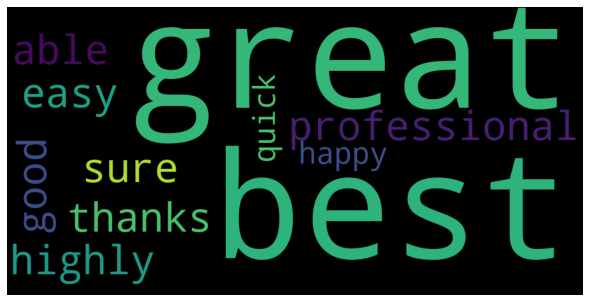

In [47]:
# plotting word cloud of 10 most frequently used positive words
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positive_words_df.iloc[0:11,0]))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


In [48]:
# separating negative words
negative_words_df= count_dtm_df.loc[count_dtm_df['Sentiment']=='Negative',:].sort_values('Count',ascending=False)

In [49]:
negative_words_df.head(10)

,Word,Count,Sentiment
436,closed,68,Negative
858,extremely,46,Negative
1059,hard,40,Negative
1686,poor,32,Negative
489,complicated,18,Negative
1352,little,15,Negative
1715,previous,13,Negative
1619,past,13,Negative
829,expected,11,Negative
2127,spent,11,Negative


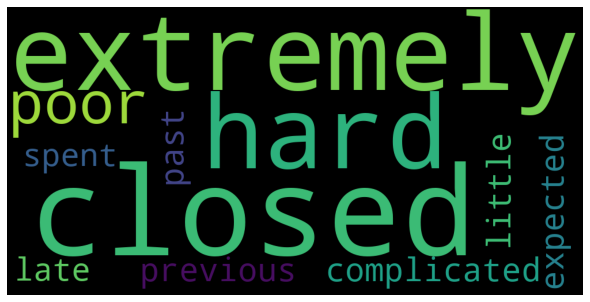

In [50]:
# plotting word cloud of 10 most frequently used negative words
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negative_words_df.iloc[0:11,0]))
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Topic Modelling
Splitting the data into train and test

In [51]:
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,random_state = 123, test_size = 0.2)

In [52]:
print('No.of observations in train_X:', len(train_X), '| No.of observations in test_X:', len(test_X))
print('No.of observations in train_Y:', len(train_Y), '| No.of observations in test_Y:', len(test_Y))

No.of observations in train_X: 404 | No.of observations in test_X: 101
No.of observations in train_Y: 404 | No.of observations in test_Y: 101


# Feature Generation using DTM and TDM
Feature generation using DTM

In [53]:
vect = CountVectorizer(strip_accents = 'unicode', stop_words = 'english', ngram_range = (1,1), min_df = 0.001, max_df = 0.95)

In [54]:
train_X_fit = vect.fit(train_X)
train_X_dtm = vect.transform(train_X)
test_X_dtm = vect.transform(test_X)

In [55]:
print(train_X_fit)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.95, max_features=None, min_df=0.001,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [56]:
print(train_X_dtm)

  (0, 31)	1
  (0, 406)	1
  (0, 569)	1
  (0, 892)	1
  (0, 922)	1
  (0, 937)	2
  (0, 946)	1
  (0, 1701)	1
  (0, 2004)	2
  (0, 2041)	1
  (0, 2101)	1
  (0, 2271)	1
  (0, 2298)	1
  (1, 406)	2
  (1, 530)	1
  (1, 630)	2
  (1, 1087)	1
  (1, 1097)	1
  (1, 1320)	1
  (1, 1375)	1
  (1, 1400)	1
  (1, 1657)	1
  (1, 1666)	1
  (1, 2120)	1
  (1, 2130)	1
  :	:
  (402, 1728)	1
  (402, 2130)	1
  (402, 2188)	1
  (402, 2298)	1
  (403, 254)	1
  (403, 337)	1
  (403, 721)	1
  (403, 772)	1
  (403, 824)	1
  (403, 827)	1
  (403, 952)	2
  (403, 1033)	1
  (403, 1233)	1
  (403, 1263)	1
  (403, 1439)	1
  (403, 1628)	1
  (403, 1666)	2
  (403, 1669)	1
  (403, 1686)	1
  (403, 1860)	1
  (403, 1889)	1
  (403, 1906)	1
  (403, 1978)	1
  (403, 2092)	1
  (403, 2293)	1


In [57]:
print(test_X_dtm)

  (0, 389)	1
  (0, 694)	1
  (0, 738)	1
  (0, 857)	1
  (0, 1263)	2
  (0, 1597)	2
  (0, 1651)	1
  (0, 1844)	1
  (0, 2299)	1
  (1, 65)	1
  (1, 210)	1
  (1, 236)	1
  (1, 261)	1
  (1, 316)	1
  (1, 411)	1
  (1, 596)	1
  (1, 621)	1
  (1, 655)	1
  (1, 688)	1
  (1, 752)	3
  (1, 811)	1
  (1, 846)	1
  (1, 853)	1
  (1, 999)	1
  (1, 1181)	1
  :	:
  (99, 2309)	1
  (100, 59)	1
  (100, 139)	1
  (100, 222)	1
  (100, 322)	1
  (100, 795)	1
  (100, 796)	1
  (100, 894)	1
  (100, 946)	1
  (100, 1000)	1
  (100, 1003)	1
  (100, 1027)	1
  (100, 1181)	1
  (100, 1349)	1
  (100, 1483)	1
  (100, 1564)	1
  (100, 1597)	1
  (100, 1650)	1
  (100, 1677)	1
  (100, 2063)	1
  (100, 2092)	1
  (100, 2101)	1
  (100, 2116)	1
  (100, 2236)	1
  (100, 2278)	1


In [58]:
vect.get_feature_names()

['10',
 '100',
 '101',
 '1014',
 '1031',
 '1040s',
 '11',
 '12',
 '13',
 '15',
 '18',
 '19th',
 '1st',
 '20',
 '200',
 '2005',
 '2011',
 '2017',
 '20k',
 '212',
 '22',
 '23',
 '2300',
 '23rd',
 '25',
 '2500',
 '27',
 '29',
 '2929',
 '2d',
 '2nd',
 '30',
 '30days',
 '30k',
 '32',
 '34',
 '35',
 '375',
 '3days',
 '3rd',
 '40',
 '401k',
 '45',
 '450',
 '4506t',
 '46',
 '4875',
 '525',
 '54510',
 '58',
 '59',
 '5th',
 '60',
 '600',
 '625',
 '770',
 '89',
 '8th',
 '995',
 'aaron',
 'aarons',
 'ability',
 'able',
 'absoltely',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accommodate',
 'accommodating',
 'accomplished',
 'account',
 'accountant',
 'accross',
 'accurate',
 'accurately',
 'accusing',
 'achieve',
 'acquired',
 'act',
 'action',
 'actual',
 'actually',
 'adam',
 'adaml',
 'adampac',
 'adan',
 'added',
 'addition',
 'additional',
 'address',
 'addressed',
 'addressresolve',
 'adjust',
 'adjusted',
 'admin',
 'admiration',
 'adverti

In [59]:
print('No. of features are', len(vect.get_feature_names()))

No. of features are 2326


In [60]:
train_X_dtm_df = pd.DataFrame(train_X_dtm.toarray(),columns = vect.get_feature_names())

In [61]:
train_X_dtm_df.head()

,10,100,101,1014,1031,1040s,11,12,13,15,...,wyndum,xx,year,years,yelp,yep,yes,zach,zelada,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# Finding how many times a term is used in train corpus
train_dtm_freq = np.sum(train_X_dtm_df, axis = 0)

In [63]:
train_dtm_freq

10        7
100       7
101       1
1014      1
1031      2
         ..
yep       1
yes       1
zach      2
zelada    1
zero      2
Length: 2326, dtype: int64

# Feature Generation using TDM

In [64]:
vect_tdm = TfidfVectorizer(strip_accents='unicode', stop_words='english', ngram_range=(1,1),min_df=0.001,max_df=0.95)

In [65]:
train_X_tdm = vect_tdm.fit_transform(train_X)
test_X_tdm = vect.transform(test_X)

In [66]:
print(train_X_tdm)

  (0, 2298)	0.14286983052671703
  (0, 946)	0.14224755314415755
  (0, 2271)	0.17571044807822656
  (0, 922)	0.3233491825918004
  (0, 892)	0.26011295239170645
  (0, 1701)	0.2512400242662845
  (0, 2041)	0.3233491825918004
  (0, 2101)	0.22021533325477322
  (0, 406)	0.1561851580910362
  (0, 569)	0.19081216066170623
  (0, 31)	0.26512133571501156
  (0, 937)	0.38453891230399817
  (0, 2004)	0.5110113727041861
  (1, 1320)	0.32157178350945675
  (1, 1097)	0.24221516698235504
  (1, 1400)	0.2144229039259181
  (1, 1375)	0.25868315281967424
  (1, 2130)	0.19906648114206718
  (1, 2120)	0.22944160479471662
  (1, 530)	0.25868315281967424
  (1, 630)	0.4479713951840844
  (1, 1657)	0.338039769346776
  (1, 1666)	0.1545477952469896
  (1, 1087)	0.3612500917730076
  (1, 406)	0.3106532661840388
  :	:
  (402, 1698)	0.1238490539966841
  (402, 1000)	0.19903961080263602
  (402, 2130)	0.19212465963127884
  (402, 2298)	0.13712974487668564
  (403, 1686)	0.2898920480946295
  (403, 337)	0.2898920480946295
  (403, 1906)	0.2

In [67]:
print(test_X_tdm)

  (0, 389)	1
  (0, 694)	1
  (0, 738)	1
  (0, 857)	1
  (0, 1263)	2
  (0, 1597)	2
  (0, 1651)	1
  (0, 1844)	1
  (0, 2299)	1
  (1, 65)	1
  (1, 210)	1
  (1, 236)	1
  (1, 261)	1
  (1, 316)	1
  (1, 411)	1
  (1, 596)	1
  (1, 621)	1
  (1, 655)	1
  (1, 688)	1
  (1, 752)	3
  (1, 811)	1
  (1, 846)	1
  (1, 853)	1
  (1, 999)	1
  (1, 1181)	1
  :	:
  (99, 2309)	1
  (100, 59)	1
  (100, 139)	1
  (100, 222)	1
  (100, 322)	1
  (100, 795)	1
  (100, 796)	1
  (100, 894)	1
  (100, 946)	1
  (100, 1000)	1
  (100, 1003)	1
  (100, 1027)	1
  (100, 1181)	1
  (100, 1349)	1
  (100, 1483)	1
  (100, 1564)	1
  (100, 1597)	1
  (100, 1650)	1
  (100, 1677)	1
  (100, 2063)	1
  (100, 2092)	1
  (100, 2101)	1
  (100, 2116)	1
  (100, 2236)	1
  (100, 2278)	1


In [68]:
vect_tdm.get_feature_names()

['10',
 '100',
 '101',
 '1014',
 '1031',
 '1040s',
 '11',
 '12',
 '13',
 '15',
 '18',
 '19th',
 '1st',
 '20',
 '200',
 '2005',
 '2011',
 '2017',
 '20k',
 '212',
 '22',
 '23',
 '2300',
 '23rd',
 '25',
 '2500',
 '27',
 '29',
 '2929',
 '2d',
 '2nd',
 '30',
 '30days',
 '30k',
 '32',
 '34',
 '35',
 '375',
 '3days',
 '3rd',
 '40',
 '401k',
 '45',
 '450',
 '4506t',
 '46',
 '4875',
 '525',
 '54510',
 '58',
 '59',
 '5th',
 '60',
 '600',
 '625',
 '770',
 '89',
 '8th',
 '995',
 'aaron',
 'aarons',
 'ability',
 'able',
 'absoltely',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accommodate',
 'accommodating',
 'accomplished',
 'account',
 'accountant',
 'accross',
 'accurate',
 'accurately',
 'accusing',
 'achieve',
 'acquired',
 'act',
 'action',
 'actual',
 'actually',
 'adam',
 'adaml',
 'adampac',
 'adan',
 'added',
 'addition',
 'additional',
 'address',
 'addressed',
 'addressresolve',
 'adjust',
 'adjusted',
 'admin',
 'admiration',
 'adverti

In [69]:
print('No.of features for tdm are',len(vect_tdm.get_feature_names()))

No.of features for tdm are 2326


In [70]:
# creating dataframe to to see which features are present in the documents
train_X_tdm_df = pd.DataFrame(train_X_tdm.toarray(),columns=vect_tdm.get_feature_names())

In [71]:
train_X_tdm_df.head()

,10,100,101,1014,1031,1040s,11,12,13,15,...,wyndum,xx,year,years,yelp,yep,yes,zach,zelada,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
test_X_tdm_df = pd.DataFrame(test_X_tdm.toarray(),columns=vect_tdm.get_feature_names())

In [73]:
test_X_tdm_df.head()

,10,100,101,1014,1031,1040s,11,12,13,15,...,wyndum,xx,year,years,yelp,yep,yes,zach,zelada,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Finding how many times a term is used in test corpus
test_tdm_freq = np.sum(test_X_tdm_df,axis=0)

In [75]:
test_tdm_freq.head(20)

10       3
100      2
101      0
1014     0
1031     0
1040s    0
11       0
12       2
13       1
15       0
18       0
19th     0
1st      0
20       0
200      0
2005     0
2011     0
2017     0
20k      0
212      0
dtype: int64

In [76]:
#train LDA Model
lda_model = LatentDirichletAllocation(n_components = 20, learning_method='online', max_iter = 50)
X_topics = lda_model.fit_transform(train_X_tdm)
topic_word = lda_model.components_
vocab = vect.get_feature_names()

In [77]:
#view the topic model
top_words = 10
topic_summaries = []

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(top_words + 1):-1]
    topic_summaries.append(''.join(topic_words))
    print(topic_words)

['effective' 'taken' 'speed' 'family' 'care' 'hand' 'congratulations'
 'brought' 'written' 'sending']
['dean' 'regular' 'basis' 'land' 'undivided' 'dream' 'huge' 'attention'
 'helped' 'gave']
['jon' 'alex' 'patient' 'quick' 'barrett' 'jocovic' 'asset' 'mortgage'
 'personable' 'process']
['world' 'properly' 'hassle' 'set' 'record' 'ways' 'costumer' 'arbor'
 'government' 'shut']
['outstanding' 'timely' 'service' 'deff' 'marcus' 'respond' 'recommend'
 'quick' 'quickly' 'wyndham']
['simply' 'responsive' 'awesome' 'inquiries' 'helpful' 'kory' 'ranee'
 'sekani' 'great' 'cool']
['told' 'didnt' 'red' 'flags' '200' 'estimates' 'switched' 'painting'
 'given' 'approval']
['bank' 'best' 'donna' 'hoped' 'jeff' 'documentation' 'exceeded'
 'expectations' 'recommended' 'hard']
['nasb' 'closing' 'rep' 'just' 'got' 'date' 'disappeared' 'sensed'
 'thankfully' 'firm']
['loan' 'process' 'great' 'service' 'mortgage' 'recommend' 'time' 'team'
 'work' 'home']
['tim' 'pope' 'unlike' 'informative' 'person' 'att

In [78]:
# view the topic summary
top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))
topic_summaries

['effective taken speed family care hand congratulations brought written sending',
 'dean regular basis land undivided dream huge attention helped gave',
 'jon alex patient quick barrett jocovic asset mortgage personable process',
 'world properly hassle set record ways costumer arbor government shut',
 'outstanding timely service deff marcus respond recommend quick quickly wyndham',
 'simply responsive awesome inquiries helpful kory ranee sekani great cool',
 'told didnt red flags 200 estimates switched painting given approval',
 'bank best donna hoped jeff documentation exceeded expectations recommended hard',
 'nasb closing rep just got date disappeared sensed thankfully firm',
 'loan process great service mortgage recommend time team work home',
 'tim pope unlike informative person attitude leehy beginning andrew pleasure',
 'real bank walks traditional values fine talk people pleasure business',
 'bean lee jason june honest responsive refinancing mortgage pleasure attentive',
 'ba

# Building Model
Building Model on DTM

In [79]:
#building naive bayesian model on DTM
naive_model = MultinomialNB()
naive_model.fit(train_X_dtm,train_Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [80]:
predict_train = naive_model.predict(train_X_dtm)
predict_test = naive_model.predict(test_X_dtm)

In [81]:
len(predict_train)

404

In [82]:
len(predict_test)

101

In [83]:
print('Accuracy on train: ',metrics.accuracy_score(train_Y,predict_train))
print('Accuracy on test: ',metrics.accuracy_score(test_Y,predict_test))

Accuracy on train:  0.9900990099009901
Accuracy on test:  0.9801980198019802


In [84]:
# predict probabilities on train and test
predict_prob_train = naive_model.predict_proba(train_X_dtm)[:,1]
predict_prob_test = naive_model.predict_proba(test_X_dtm)[:,1]

In [85]:
print('ROC_AUC score on train: ',metrics.roc_auc_score(train_Y,predict_prob_train))
print('ROC_AUC score on test: ',metrics.roc_auc_score(test_Y,predict_prob_test))

ROC_AUC score on train:  0.9962667302116843
ROC_AUC score on test:  0.9866131191432396


In [86]:
# confusion matrix on test 
cm_test = metrics.confusion_matrix(test_Y,predict_test,[5,1])

In [87]:
cm_test

array([[82,  1],
       [ 1, 17]], dtype=int64)

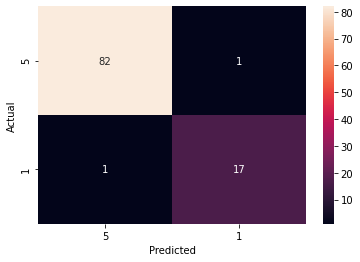

In [88]:
import seaborn as sns
sns.heatmap(cm_test,annot=True,xticklabels=[5,1],yticklabels=[5,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Building Model on TDM


In [89]:
# building naive bayes model on TDM
naive_model = MultinomialNB()
naive_model.fit(train_X_tdm,train_Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [90]:
predict_train = naive_model.predict(train_X_tdm)
predict_test = naive_model.predict(test_X_tdm)

In [91]:
len(predict_test)

101

In [92]:
# predict probabilities on train and test
predict_prob_train = naive_model.predict_proba(train_X_tdm)[:,1]
predict_prob_test = naive_model.predict_proba(test_X_tdm)[:,1]

In [93]:
print('ROC_AUC curve on train:',metrics.roc_auc_score(train_Y,predict_prob_train))
print('ROC_AUC curve on test:',metrics.roc_auc_score(test_Y,predict_prob_test))

ROC_AUC curve on train: 0.9953135549465825
ROC_AUC curve on test: 0.9832663989290495


In [94]:
#confusion matrix on test
cm_test = metrics.confusion_matrix(test_Y,predict_test,[5,1])

In [95]:
cm_test

array([[82,  1],
       [ 7, 11]], dtype=int64)

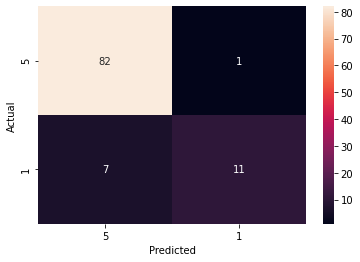

In [96]:
import seaborn as sns
sns.heatmap(cm_test,annot=True,xticklabels=[5,1],yticklabels=[5,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model showed better results using DTM values and using unigrams.

# Predicting star ratings using reviews

In [97]:
preddicted_ratings = pd.DataFrame({'Actual Stars':test_Y,'Predicted Stars':predict_test})

In [98]:
preddicted_ratings

,Actual Stars,Predicted Stars
372,5,5
310,5,5
444,5,5
421,5,5
429,5,5
...,...,...
102,1,5
148,5,5
344,5,5
466,5,5


In [100]:
preddicted_ratings.to_csv('preddicted_ratings.csv',index = False)